# adımlar

1. datayı yükle, ? lerini at, result ve feature ları ayır
2. diff leri al veriye ekle
3. kategorikleri al ve dummy e çevir, kategorikleri veriden at
4. 

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('M30_EURUSD.csv')
data.head()

C:\Users\ihkar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5,6,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,46,47,48,49,50,51,55,56,58,59,61,62,64,65,67,68,70,71,73,74,76,77,79,80,82,83,85,86,88,90,92,94,96,98,100,102,104,106,108,110,112,114,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,139,140,142,143,145,146,147,148,149,150,151,152,153,154,155,156,158,160,162,164,166,168,170,172,174,176,178,179,180,181,183,185,186,188,189,191,192,194,195,197,198,200,201,203,204,206,207,209,210,212,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,30

,time,open,high,low,close,ind_5,ind_6,ind_7,ind_8,ind_9,...,80_signal,90_signal,100_signal,120_signal,140_signal,160_signal,180_signal,200_signal,220_signal,240_signal
0,2017.06.26 04:00,1.11894,1.11959,1.11894,1.11942,?,?,?,?,?,...,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY
1,2017.06.26 04:30,1.11943,1.11960,1.11913,1.11942,?,?,?,?,?,...,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY
2,2017.06.26 05:00,1.11940,1.11943,1.11891,1.11922,?,?,?,?,?,...,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY
3,2017.06.26 05:30,1.11924,1.11968,1.11919,1.11957,?,?,?,?,?,...,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY
4,2017.06.26 06:00,1.11955,1.11955,1.11914,1.11926,?,?,?,?,?,...,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY


In [3]:
# soru işaretleri olan satırlar veriden silindi.
data = data.replace("?", np.nan)
data = data.dropna()
data.head()

,time,open,high,low,close,ind_5,ind_6,ind_7,ind_8,ind_9,...,80_signal,90_signal,100_signal,120_signal,140_signal,160_signal,180_signal,200_signal,220_signal,240_signal
2001,2017.08.22 20:30,1.17502,1.17538,1.17478,1.17505,-20,-19,NONE,7.142857142857143,92.85714285714286,...,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY
2002,2017.08.22 21:00,1.17505,1.17531,1.17492,1.17500,-20,-20,NONE,0.0,85.71428571428571,...,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY
2003,2017.08.22 21:30,1.17496,1.17599,1.17487,1.17583,-19,-20,BUY,35.714285714285715,78.57142857142857,...,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY
2004,2017.08.22 22:00,1.17582,1.17627,1.17565,1.17600,-17,-19,NONE,28.571428571428573,71.42857142857143,...,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY
2005,2017.08.22 22:30,1.17600,1.17630,1.17595,1.17603,-13,-17,NONE,21.428571428571427,64.28571428571429,...,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY


In [4]:
df_diff = pd.DataFrame()
'''
df_diff['close_open'] = data['close'] - data['open']
df_diff['high_low'] = data['high'] - data['low']
df_diff['close_high'] = data['close'] - data['high'] 
df_diff['close_low'] = data['close'] - data['low']
df_diff['open_high'] = data['open'] - data['high']
df_diff['open_low'] = data['open'] - data['low']
'''
df_diff['close_open_pct'] = ( data['close'] - data['open'] ) / data['open'] 
df_diff['high_low_pct'] = ( data['high'] - data['low'] ) / data['low']
df_diff['close_high_pct'] =(  data['close'] - data['high'] ) /  data['high'] 
df_diff['close_low_pct'] = ( data['close'] - data['low'] ) / data['low'] 
df_diff['open_high_pct'] = ( data['open'] - data['high'] ) / data['high'] 
df_diff['open_low_pct'] = ( data['open'] - data['low'] ) / data['low'] 
df_diff = df_diff * 100

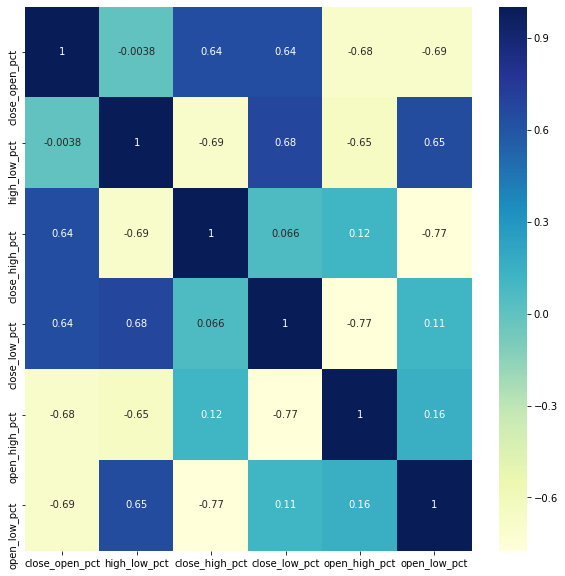

In [5]:
corr1 = df_diff.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr1, annot = True,cmap="YlGnBu")

In [6]:
data['100_signal'].value_counts()

SELL    9600
BUY     8214
NONE    2087
Name: 100_signal, dtype: int64

In [7]:
df = data.iloc[:,5:430] #datamızdan _signal kolonlarını attık
df = pd.concat([df_diff, df],axis=1)

In [8]:
#categorical olan kolonlarımız
cat_column_names = ['ind_7','ind_11','ind_24','ind_38','ind_54','ind_57','ind_60','ind_63','ind_66','ind_69','ind_72','ind_75',
                    'ind_78','ind_81','ind_84','ind_87','ind_89','ind_91','ind_93','ind_95','ind_97','ind_99','ind_101',
                    'ind_103','ind_105','ind_107','ind_109', 'ind_111', 'ind_113', 'ind_115','ind_138','ind_141','ind_144',
                    'ind_157','ind_159','ind_161','ind_163','ind_165','ind_167','ind_169','ind_171','ind_173','ind_175',
                    'ind_177','ind_182','ind_184','ind_187','ind_190','ind_193','ind_196','ind_199','ind_202','ind_205',
                    'ind_208','ind_211','ind_213','ind_384','ind_386','ind_388','ind_390']

In [9]:
# categorical kolonların dummy var. oalrak değiştirdik
dms = pd.get_dummies(df[cat_column_names])
dms_none_cols = dms.filter(regex = '_NONE').columns
for i in dms_none_cols:
    dms.drop(i,axis=1,inplace=True)
dms_red_cols = dms.filter(regex = '_RED').columns
for i in dms_red_cols:
    dms.drop(i,axis=1,inplace=True)

dms.head()

,ind_7_BUY,ind_7_SELL,ind_11_BUY,ind_11_SELL,ind_24_BUY,ind_24_SELL,ind_38_BUY,ind_38_SELL,ind_54_BUY,ind_54_SELL,...,ind_211_BUY,ind_211_SELL,ind_384_BUY,ind_384_SELL,ind_386_BUY,ind_386_SELL,ind_388_BUY,ind_388_SELL,ind_390_BUY,ind_390_SELL
2001,0,0,0,1,1,0,1,0,0,1,...,0,1,0,1,0,0,0,1,0,1
2002,0,0,0,1,1,0,1,0,0,1,...,0,1,0,1,0,0,0,1,0,1
2003,1,0,0,1,1,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1
2004,0,0,0,1,1,0,1,0,1,0,...,0,0,0,1,1,0,1,0,0,1
2005,0,0,0,1,1,0,1,0,1,0,...,0,0,0,1,1,0,1,0,0,1


In [10]:
#datadan categorical olan kolonları çıkarıyoruz ve type nı değiştiriyoruz
df = df.drop(cat_column_names,axis=1).astype("float64")
df.head()

,close_open_pct,high_low_pct,close_high_pct,close_low_pct,open_high_pct,open_low_pct,ind_5,ind_6,ind_8,ind_9,...,ind_420,ind_421,ind_422,ind_423,ind_424,ind_425,ind_426,ind_427,ind_428,ind_429
2001,0.002553,0.051073,-0.028076,0.022983,-0.030628,0.020429,-20.0,-19.0,7.142857,92.857143,...,73.0,-79.0,-99.0,202.0,0.290323,0.120805,0.537500,0.510815,0.320588,0.359703
2002,-0.004255,0.033194,-0.026376,0.006809,-0.022122,0.011065,-20.0,-20.0,0.000000,85.714286,...,74.0,-78.0,-99.0,203.0,1.000000,0.129496,0.560261,0.452514,0.312500,0.360372
2003,0.074045,0.095330,-0.013606,0.081711,-0.087586,0.007660,-19.0,-20.0,35.714286,78.571429,...,65.0,-87.0,-107.0,195.0,0.931507,0.593103,0.533333,0.476357,0.344390,0.369380
2004,0.015308,0.052737,-0.022954,0.029771,-0.038257,0.014460,-17.0,-19.0,28.571429,71.428571,...,64.0,-88.0,-109.0,193.0,0.950495,0.699387,0.492754,0.596421,0.383929,0.373567
2005,0.002551,0.029763,-0.022953,0.006803,-0.025504,0.004252,-13.0,-17.0,21.428571,64.285714,...,63.0,-88.0,-109.0,193.0,1.000000,0.959016,0.503623,0.571730,0.386161,0.372810


In [11]:
#dummy e çevirdiğimiz datalar ile X imizi birleştiriyoruz
# X = pd.concat([df,dms],axis=1)
# X = df_diff.astype("float64")

In [12]:
data_results = data.iloc[:,430:-1]


In [13]:
for i in data_results.columns:
    print(i, 'kolonunun veri sayıları :\n',data_results[i].value_counts())

30_signal kolonunun veri sayıları :
 SELL    9843
BUY     9597
NONE     461
Name: 30_signal, dtype: int64
40_signal kolonunun veri sayıları :
 SELL    9774
BUY     9303
NONE     824
Name: 40_signal, dtype: int64
50_signal kolonunun veri sayıları :
 SELL    9525
BUY     9127
NONE    1249
Name: 50_signal, dtype: int64
60_signal kolonunun veri sayıları :
 SELL    9516
BUY     8894
NONE    1491
Name: 60_signal, dtype: int64
70_signal kolonunun veri sayıları :
 SELL    9555
BUY     8724
NONE    1622
Name: 70_signal, dtype: int64
80_signal kolonunun veri sayıları :
 SELL    9572
BUY     8552
NONE    1777
Name: 80_signal, dtype: int64
90_signal kolonunun veri sayıları :
 SELL    9547
BUY     8328
NONE    2026
Name: 90_signal, dtype: int64
100_signal kolonunun veri sayıları :
 SELL    9600
BUY     8214
NONE    2087
Name: 100_signal, dtype: int64
120_signal kolonunun veri sayıları :
 SELL    9627
BUY     8131
NONE    2143
Name: 120_signal, dtype: int64
140_signal kolonunun veri sayıları :
 SELL

In [14]:
y = data_results # .shift(periods=1)
# X = X.iloc[1:]
# y = y.iloc[1:]

In [15]:
# splitting data to train and test
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20, shuffle = False)
dms_train, dms_test = train_test_split(dms, test_size=0.20, shuffle = False)

# pca

In [16]:
pca = PCA()
X_train_scaled = pca.fit_transform(scale(X_train))
X_test_scaled = pca.fit_transform(scale(X_test))
arr = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)
# tmp'den büyük değerleri değişken olarak aldık tmp'den küçük sayısı +1 tane sonra tmpden büyük olanı elde etmiş oluruz
tmp = 0.99
num_var = sum((arr < tmp*100)) + 1 
print('pca sonrası değişken sayısı: ',num_var)

pca sonrası değişken sayısı:  122


In [17]:
X_train_scaled = pd.DataFrame(X_train_scaled[:,0:num_var], index = y_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled[:,0:num_var], index = y_test.index)


In [18]:
X_train_scaled.set_index(y_train.index)
X_test_scaled.set_index(y_test.index)
X_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
2001,8.804145,2.137616,1.951083,-0.250941,0.752378,-2.140369,-0.495764,-4.508254,3.370881,-1.911002,...,-0.036233,0.065021,-0.307701,0.248742,-0.151798,-0.171040,0.115522,0.116647,0.217787,0.060115
2002,8.864256,0.848592,2.110566,-1.112317,-0.051568,-1.999398,0.372588,-2.925739,2.225221,-2.000832,...,0.071754,0.356286,-0.067577,0.289377,-0.077844,-0.087121,0.220592,-0.014130,0.327878,0.249298
2003,4.162993,-4.145153,5.805137,-1.303527,0.538646,-1.270098,-0.807807,-2.918935,2.735785,-1.816786,...,-0.250682,0.000076,-0.521070,0.090213,-0.158240,-0.016409,0.419769,-0.070469,0.255367,0.470908
2004,2.793592,-4.966542,4.230026,-0.771562,-0.615584,-2.841909,0.476669,-2.331847,2.219489,-2.562661,...,-0.264423,0.015783,-0.522477,0.178766,-0.188668,0.148464,0.343561,-0.058332,0.339162,0.750511
2005,1.958231,-5.050107,2.175464,-0.433423,-1.188116,-3.890317,1.205440,-2.457260,2.337145,-2.463628,...,-0.457931,-0.049754,-0.070201,-0.089084,-0.324458,0.219392,0.226795,0.012766,0.305249,0.811491


In [19]:
# verileri tekrar standart isimlerle kullanmak için değiştiriyoruz
# dummy variablelar X'e ekleniyor
X_test =  pd.concat([X_test_scaled,dms_test],axis=1)
X_train = pd.concat([X_train_scaled,dms_train],axis=1)

In [20]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,ind_211_BUY,ind_211_SELL,ind_384_BUY,ind_384_SELL,ind_386_BUY,ind_386_SELL,ind_388_BUY,ind_388_SELL,ind_390_BUY,ind_390_SELL
2001,8.804145,2.137616,1.951083,-0.250941,0.752378,-2.140369,-0.495764,-4.508254,3.370881,-1.911002,...,0,1,0,1,0,0,0,1,0,1
2002,8.864256,0.848592,2.110566,-1.112317,-0.051568,-1.999398,0.372588,-2.925739,2.225221,-2.000832,...,0,1,0,1,0,0,0,1,0,1
2003,4.162993,-4.145153,5.805137,-1.303527,0.538646,-1.270098,-0.807807,-2.918935,2.735785,-1.816786,...,0,0,0,1,0,0,0,1,0,1
2004,2.793592,-4.966542,4.230026,-0.771562,-0.615584,-2.841909,0.476669,-2.331847,2.219489,-2.562661,...,0,0,0,1,1,0,1,0,0,1
2005,1.958231,-5.050107,2.175464,-0.433423,-1.188116,-3.890317,1.205440,-2.457260,2.337145,-2.463628,...,0,0,0,1,1,0,1,0,0,1


# decision tree

In [21]:
for col_name in y.columns:    
    print(col_name, 'kolonu için model sonuçları : \n')
    cart = DecisionTreeClassifier()
    cart_model = cart.fit(X_train, y_train[col_name])
    y_pred = cart_model.predict(X_test)
    print('accuracy score : ',accuracy_score(y_test[col_name], y_pred))
    print('classification report \n: ',classification_report(y_test[col_name], y_pred))
    print("---------------------------------------------------------------")

30_signal kolonu için model sonuçları : 

accuracy score :  0.44913338357196686
classification report 
:                precision    recall  f1-score   support

         BUY       0.41      0.49      0.45      1659
        NONE       0.00      0.00      0.00       278
        SELL       0.51      0.47      0.49      2044

    accuracy                           0.45      3981
   macro avg       0.30      0.32      0.31      3981
weighted avg       0.43      0.45      0.44      3981

---------------------------------------------------------------
40_signal kolonu için model sonuçları : 

accuracy score :  0.4325546345139412
classification report 
:                precision    recall  f1-score   support

         BUY       0.39      0.49      0.43      1569
        NONE       0.13      0.03      0.05       448
        SELL       0.50      0.48      0.49      1964

    accuracy                           0.43      3981
   macro avg       0.34      0.33      0.32      3981
weighted avg      

# random forest

In [22]:
for col_name in y.columns:    
    print(col_name, 'kolonu için model sonuçları : \n')
    rf = RandomForestClassifier()
    rf_model = rf.fit(X_train, y_train[col_name])
    y_pred = rf_model.predict(X_test)
    print('accuracy score : ',accuracy_score(y_test[col_name], y_pred))
    print('classification report \n: ',classification_report(y_test[col_name], y_pred))
    print("---------------------------------------------------------------")

30_signal kolonu için model sonuçları : 



C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy score :  0.45867872393870884
classification report 
:                precision    recall  f1-score   support

         BUY       0.42      0.64      0.51      1659
        NONE       0.00      0.00      0.00       278
        SELL       0.52      0.38      0.44      2044

    accuracy                           0.46      3981
   macro avg       0.31      0.34      0.31      3981
weighted avg       0.44      0.46      0.44      3981

---------------------------------------------------------------
40_signal kolonu için model sonuçları : 



C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy score :  0.423260487314745
classification report 
:                precision    recall  f1-score   support

         BUY       0.39      0.56      0.46      1569
        NONE       0.00      0.00      0.00       448
        SELL       0.47      0.41      0.44      1964

    accuracy                           0.42      3981
   macro avg       0.29      0.32      0.30      3981
weighted avg       0.39      0.42      0.40      3981

---------------------------------------------------------------
50_signal kolonu için model sonuçları : 



C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy score :  0.40944486309972367
classification report 
:                precision    recall  f1-score   support

         BUY       0.36      0.54      0.44      1487
        NONE       0.00      0.00      0.00       616
        SELL       0.47      0.44      0.45      1878

    accuracy                           0.41      3981
   macro avg       0.28      0.33      0.30      3981
weighted avg       0.36      0.41      0.38      3981

---------------------------------------------------------------
60_signal kolonu için model sonuçları : 



C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy score :  0.41095202210499876
classification report 
:                precision    recall  f1-score   support

         BUY       0.36      0.57      0.44      1402
        NONE       0.25      0.00      0.00       682
        SELL       0.48      0.44      0.46      1897

    accuracy                           0.41      3981
   macro avg       0.36      0.34      0.30      3981
weighted avg       0.40      0.41      0.37      3981

---------------------------------------------------------------
70_signal kolonu için model sonuçları : 



C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy score :  0.4101984426023612
classification report 
:                precision    recall  f1-score   support

         BUY       0.34      0.55      0.42      1316
        NONE       0.00      0.00      0.00       712
        SELL       0.50      0.46      0.48      1953

    accuracy                           0.41      3981
   macro avg       0.28      0.34      0.30      3981
weighted avg       0.36      0.41      0.37      3981

---------------------------------------------------------------
80_signal kolonu için model sonuçları : 



C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy score :  0.3928661140416981
classification report 
:                precision    recall  f1-score   support

         BUY       0.31      0.55      0.40      1246
        NONE       0.25      0.00      0.01       802
        SELL       0.49      0.46      0.47      1933

    accuracy                           0.39      3981
   macro avg       0.35      0.34      0.29      3981
weighted avg       0.39      0.39      0.36      3981

---------------------------------------------------------------
90_signal kolonu için model sonuçları : 



C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy score :  0.37704094448631
classification report 
:                precision    recall  f1-score   support

         BUY       0.29      0.50      0.37      1168
        NONE       0.15      0.00      0.00       955
        SELL       0.47      0.49      0.48      1858

    accuracy                           0.38      3981
   macro avg       0.30      0.33      0.28      3981
weighted avg       0.34      0.38      0.33      3981

---------------------------------------------------------------
100_signal kolonu için model sonuçları : 



C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy score :  0.3589550364230093
classification report 
:                precision    recall  f1-score   support

         BUY       0.28      0.49      0.35      1147
        NONE       0.14      0.00      0.00       998
        SELL       0.45      0.47      0.46      1836

    accuracy                           0.36      3981
   macro avg       0.29      0.32      0.27      3981
weighted avg       0.32      0.36      0.31      3981

---------------------------------------------------------------
120_signal kolonu için model sonuçları : 



C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy score :  0.36473247927656366
classification report 
:                precision    recall  f1-score   support

         BUY       0.28      0.50      0.36      1138
        NONE       0.29      0.01      0.01       994
        SELL       0.45      0.48      0.46      1849

    accuracy                           0.36      3981
   macro avg       0.34      0.33      0.28      3981
weighted avg       0.36      0.36      0.32      3981

---------------------------------------------------------------
140_signal kolonu için model sonuçları : 



C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy score :  0.35443355940718413
classification report 
:                precision    recall  f1-score   support

         BUY       0.27      0.44      0.33      1151
        NONE       0.30      0.01      0.02       995
        SELL       0.44      0.49      0.46      1835

    accuracy                           0.35      3981
   macro avg       0.33      0.31      0.27      3981
weighted avg       0.35      0.35      0.31      3981

---------------------------------------------------------------
160_signal kolonu için model sonuçları : 



C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy score :  0.35267520723436324
classification report 
:                precision    recall  f1-score   support

         BUY       0.26      0.41      0.32      1183
        NONE       0.26      0.01      0.03       968
        SELL       0.43      0.50      0.46      1830

    accuracy                           0.35      3981
   macro avg       0.32      0.31      0.27      3981
weighted avg       0.34      0.35      0.31      3981

---------------------------------------------------------------
180_signal kolonu için model sonuçları : 



C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy score :  0.351419241396634
classification report 
:                precision    recall  f1-score   support

         BUY       0.27      0.47      0.34      1153
        NONE       0.25      0.02      0.03      1045
        SELL       0.44      0.47      0.45      1783

    accuracy                           0.35      3981
   macro avg       0.32      0.32      0.28      3981
weighted avg       0.34      0.35      0.31      3981

---------------------------------------------------------------
200_signal kolonu için model sonuçları : 



C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy score :  0.3463953780457172
classification report 
:                precision    recall  f1-score   support

         BUY       0.26      0.49      0.34      1044
        NONE       0.30      0.02      0.04      1196
        SELL       0.43      0.48      0.46      1741

    accuracy                           0.35      3981
   macro avg       0.33      0.33      0.28      3981
weighted avg       0.35      0.35      0.30      3981

---------------------------------------------------------------
220_signal kolonu için model sonuçları : 



C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy score :  0.3295654358201457
classification report 
:                precision    recall  f1-score   support

         BUY       0.23      0.49      0.31       909
        NONE       0.37      0.05      0.08      1334
        SELL       0.42      0.46      0.44      1738

    accuracy                           0.33      3981
   macro avg       0.34      0.33      0.28      3981
weighted avg       0.36      0.33      0.29      3981

---------------------------------------------------------------


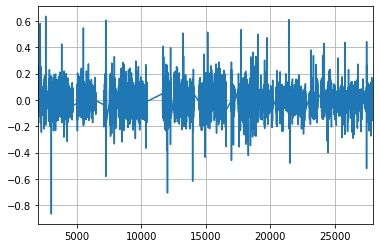

In [23]:

df_diff['close_open_pct'].plot(grid=True)

plt.show()

In [24]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train['220_signal'])
y_pred = cart_model.predict(X_test)
print('accuracy score : ',accuracy_score(y_test['220_signal'], y_pred))
print('classification report \n: ',classification_report(y_test['220_signal'], y_pred))
print("---------------------------------------------------------------")

accuracy score :  0.3501632755589048
classification report 
:                precision    recall  f1-score   support

         BUY       0.25      0.42      0.31       909
        NONE       0.30      0.13      0.18      1334
        SELL       0.45      0.48      0.47      1738

    accuracy                           0.35      3981
   macro avg       0.33      0.34      0.32      3981
weighted avg       0.35      0.35      0.33      3981

---------------------------------------------------------------


In [25]:
cart_grid = {"max_depth":[5,6,7,8,10], "min_samples_split":[5,6,7,8,10,12]}
cart_cv = GridSearchCV(cart, cart_grid, cv=10, n_jobs =-1, verbose = 2)
cart_cv_model = cart_cv.fit(X_test, y_test['220_signal'])

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   21.1s finished


In [26]:
print('En iyi parametreler : ' + str(cart_cv_model.best_params_))

En iyi parametreler : {'max_depth': 6, 'min_samples_split': 8}


In [27]:
cart = DecisionTreeClassifier(max_depth = 6, min_samples_split=12)
cart_tuned = cart.fit(X_train, y_train['220_signal'])
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test['220_signal'], y_pred)

0.3579502637528259

In [28]:
print(classification_report(y_test['220_signal'], y_pred))

              precision    recall  f1-score   support

         BUY       0.26      0.62      0.37       909
        NONE       0.23      0.01      0.03      1334
        SELL       0.48      0.49      0.48      1738

    accuracy                           0.36      3981
   macro avg       0.32      0.37      0.29      3981
weighted avg       0.34      0.36      0.30      3981

